In [36]:
#Question 1

#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd
from sklearn.decomposition import PCA
from sklearn import *
import numpy as np
import pandas as pd
from pandas import read_csv
from numpy import zeros
from numpy import diag
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from scipy.linalg import svd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.linalg import svd
from sklearn.decomposition import PCA

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import numpy as np  
from numpy import array
from numpy import diag
from numpy import dot
from numpy import zeros
from scipy.linalg import svd



In [16]:
#File Upload
data = pd.read_csv("audi_2022.csv")
Matrix_A = data.head(10)
Matrix_A


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
5,A1,2016,13900,Automatic,32260,Petrol,30,58.9,1.4
6,A6,2016,13250,Automatic,76788,Diesel,30,61.4,2.0
7,A4,2016,11750,Manual,75185,Diesel,20,70.6,2.0
8,A3,2015,10200,Manual,46112,Petrol,20,60.1,1.4
9,A1,2016,12000,Manual,22451,Petrol,30,55.4,1.4


In [17]:
#Checking for missng values
Matrix_A.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [9]:
#Encoding categorical datasets
le = preprocessing.LabelEncoder()
A = Matrix_A.iloc[:10]
num = A.select_dtypes('number').columns.to_list()
cat = A.select_dtypes('object').columns.to_list()
num_feature = A[num]
cat_feature = A[cat]
print('Num Feature',num_feature.columns)
print('Cat Feature',cat_feature.columns)

A['model'] = preprocessing.LabelEncoder().fit_transform(A['model'])
A['transmission'] = A['transmission'].map({'Manual':0,'Automatic':1})
A['fuelType'] = A['fuelType'].map({'Petrol':0,'Diesel':1})

A = pd.concat([A, pd.get_dummies(data['model'], prefix='model')], axis=1)
A = pd.concat([A, pd.get_dummies(data['transmission'], prefix='transmission')], axis=1)
A = pd.concat([A, pd.get_dummies(data['fuelType'], prefix='fuelType')], axis=1)

A = A.dropna()
A = A.loc[:, A.any()]
y = A['price']
A = A.drop(columns = 'price')
A = A.drop(columns = ["model", "transmission", "fuelType"])
A

Num Feature Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')
Cat Feature Index(['model', 'transmission', 'fuelType'], dtype='object')


,year,mileage,tax,mpg,engineSize,model_ A1,model_ A3,model_ A4,model_ A6,transmission_Automatic,transmission_Manual,fuelType_Diesel,fuelType_Petrol
0,2017.0,15735.0,150.0,55.4,1.4,1,0,0,0,0,1,0,1
1,2016.0,36203.0,20.0,64.2,2.0,0,0,0,1,1,0,1,0
2,2016.0,29946.0,30.0,55.4,1.4,1,0,0,0,0,1,0,1
3,2017.0,25952.0,145.0,67.3,2.0,0,0,1,0,1,0,1,0
4,2019.0,1998.0,145.0,49.6,1.0,0,1,0,0,0,1,0,1
5,2016.0,32260.0,30.0,58.9,1.4,1,0,0,0,1,0,0,1
6,2016.0,76788.0,30.0,61.4,2.0,0,0,0,1,1,0,1,0
7,2016.0,75185.0,20.0,70.6,2.0,0,0,1,0,0,1,1,0
8,2015.0,46112.0,20.0,60.1,1.4,0,1,0,0,0,1,0,1
9,2016.0,22451.0,30.0,55.4,1.4,1,0,0,0,0,1,0,1


In [5]:
A.shape

(10, 13)

In [10]:
#SVD/PCA
U, s, VT = svd(A)
Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[:A.shape[0], :A.shape[0]] = np.diag(s)

A_original = U.dot(Sigma.dot(VT))
#A_orig = pd.DataFrame(A_original, columns = ["model", "year","transmission", "mileage","fuelType", "tax","mpg","engineSize"])
A_original

array([[ 2.01700000e+03,  1.57350000e+04,  1.50000000e+02,
         5.54000000e+01,  1.40000000e+00,  1.00000000e+00,
         1.62332818e-15,  3.19140385e-15, -4.29881307e-15,
        -5.32295964e-15,  1.00000000e+00, -1.14076836e-15,
         1.00000000e+00],
       [ 2.01600000e+03,  3.62030000e+04,  2.00000000e+01,
         6.42000000e+01,  2.00000000e+00, -6.48704969e-15,
        -3.56023336e-15, -1.28395476e-15,  1.00000000e+00,
         1.00000000e+00, -1.59632149e-14,  1.00000000e+00,
        -9.60223189e-15],
       [ 2.01600000e+03,  2.99460000e+04,  3.00000000e+01,
         5.54000000e+01,  1.40000000e+00,  1.00000000e+00,
         6.74139222e-16,  3.76616782e-15, -4.27959670e-15,
        -4.52035037e-15,  1.00000000e+00, -3.83501691e-16,
         1.00000000e+00],
       [ 2.01700000e+03,  2.59520000e+04,  1.45000000e+02,
         6.73000000e+01,  2.00000000e+00, -8.42194597e-15,
        -2.63101704e-15,  1.00000000e+00,  1.42656018e-14,
         1.00000000e+00, -2.03568970e

In [ ]:

T = U.dot(Sigma)
T

n_elements = 3
Sigma = Sigma[:, :n_elements]
VT = VT[:n_elements, :]

A_original2 = U.dot(Sigma.dot(VT))
A_orig2 = pd.DataFrame(A_original2, columns = ["year", "mileage","tax", "mpg", 
                                               "engineSize","model_ A1","model_ A3",
                                               "model_ A4","model_ A6","transmission_Automatic",
                                               "transmission_Manual","fuelType_Diesel","fuelType_Petrol"])
A_orig2

,year,mileage,tax,mpg,engineSize,model_ A1,model_ A3,model_ A4,model_ A6,transmission_Automatic,transmission_Manual,fuelType_Diesel,fuelType_Petrol
0,2016.948275,15734.999502,149.939096,57.510845,1.482202,0.339440,0.305199,0.348864,0.006126,0.351081,0.648548,0.354990,0.644639
1,2016.134329,36203.001259,20.146050,58.764410,1.524540,0.577347,0.193651,0.003949,0.225191,0.359099,0.641039,0.229140,0.770998
2,2015.944979,29945.999493,29.941171,57.623794,1.458175,0.630475,0.222972,-0.029976,0.176487,0.327711,0.672247,0.146511,0.853447
3,2017.189843,25952.001729,145.200044,59.652828,1.610575,0.205144,0.259080,0.456817,0.078776,0.413222,0.586595,0.535593,0.464224
4,2018.880103,1997.998935,144.880263,54.401623,1.290374,0.569601,0.365801,0.149747,-0.084579,0.256586,0.743984,0.065168,0.935402
5,2016.019104,32260.000161,30.016966,58.138111,1.489305,0.595220,0.212711,-0.000168,0.192239,0.342898,0.657105,0.192071,0.807932
6,2015.836651,76787.998550,29.833053,67.953908,2.084613,-0.077206,0.014722,0.566201,0.496360,0.633467,0.366610,1.062561,-0.062484
7,2016.080802,75185.000709,20.082247,67.362718,2.045928,-0.011675,0.020355,0.500201,0.491374,0.613577,0.386678,0.991575,0.008680
8,2014.980022,46111.999793,19.976371,60.917773,1.656232,0.427584,0.149378,0.129689,0.292952,0.423579,0.576024,0.422641,0.576962
9,2015.985939,22450.999869,29.984779,55.972160,1.357999,0.743611,0.256302,-0.125252,0.125289,0.278815,0.721135,0.000037,0.999913


[9.99996429e-01 3.53425471e-06 3.43716003e-08]


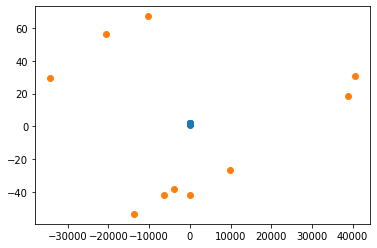

PCA(n_components=3)


In [ ]:
#PCA

pca = PCA(n_components=3)
pc = pca.fit_transform(A)
print(pca.explained_variance_ratio_)
ddd = pca.fit(A)

correlations = A.corr(method = 'pearson')
correlations

fig, ax = plt.subplots()
plt.scatter(A['fuelType_Diesel'], A['engineSize'])
plt.scatter(pc[:, 0], pc[:, 1])
plt.show()

In [11]:
#Encoding categorical datasets
le = preprocessing.LabelEncoder()
Aa = data
num = Aa.select_dtypes('number').columns.to_list()
cat = Aa.select_dtypes('object').columns.to_list()
num_feature = Aa[num]
cat_feature = Aa[cat]
print('Num Feature',num_feature.columns)
print('Cat Feature',cat_feature.columns)

Aa['model'] = preprocessing.LabelEncoder().fit_transform(Aa['model'])
Aa['transmission'] = Aa['transmission'].map({'Manual':0,'Automatic':1, 'Semi-Auto':2})
Aa['fuelType'] = Aa['fuelType'].map({'Petrol':0,'Diesel':1, 'Hybrid':2})

Aa = pd.concat([Aa, pd.get_dummies(data['model'], prefix='model')], axis=1)
Aa = pd.concat([Aa, pd.get_dummies(data['transmission'], prefix='transmission')], axis=1)
Aa = pd.concat([Aa, pd.get_dummies(data['fuelType'], prefix='fuelType')], axis=1)

Aa = Aa.dropna()
Aa = Aa.loc[:, Aa.any()]
Aa = Aa.drop(columns = ["model", "transmission", "fuelType"])

y = Aa['price']
Aa = Aa.drop(columns = 'price')

Num Feature Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')
Cat Feature Index(['model', 'transmission', 'fuelType'], dtype='object')


In [12]:
Aa
pca = PCA(n_components=3)
pc = pca.fit_transform(Aa)
print(pca.explained_variance_ratio_)

X = pc

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

[9.99991797e-01 8.04339239e-06 1.52858376e-07]
0.4754501756783591


In [13]:
U, s, VT = svd(Aa)
Sigma = np.zeros((Aa.shape[0], Aa.shape[1]))
Sigma[:Aa.shape[1], :Aa.shape[1]] = np.diag(s)

n_elements = 3
Sigma = Sigma[:, :n_elements]
VT = VT[:n_elements, :]
T = U.dot(Sigma)

Aa

,year,mileage,tax,mpg,engineSize,model_0,model_1,model_2,model_3,model_4,...,model_22,model_23,model_24,model_25,transmission_0,transmission_1,transmission_2,fuelType_0,fuelType_1,fuelType_2
0,2017,15735,150,55.4,1.4,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,2016,36203,20,64.2,2.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,2016,29946,30,55.4,1.4,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,2017,25952,145,67.3,2.0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,2019,1998,145,49.6,1.0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,2020,4018,145,49.6,1.0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
10664,2020,1978,150,49.6,1.0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
10665,2020,609,150,49.6,1.0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
10666,2017,8646,150,47.9,1.4,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(T, y, test_size = 0.2)

regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.42556461232243337


# 1f

In [19]:
X = data.iloc[:,[0,1,3,4,5,6,7,8]].values
Y = data.iloc[:,[2]].values
print(X)

[[' A1' 2017 'Manual' ... 150 55.4 1.4]
 [' A6' 2016 'Automatic' ... 20 64.2 2.0]
 [' A1' 2016 'Manual' ... 30 55.4 1.4]
 ...
 [' A3' 2020 'Manual' ... 150 49.6 1.0]
 [' Q3' 2017 'Automatic' ... 150 47.9 1.4]
 [' Q3' 2016 'Manual' ... 150 47.9 1.4]]


In [21]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,2] = le2.fit_transform(X[:,2])
le2 = LabelEncoder()
X[:,4] = le1.fit_transform(X[:,4])
le3 = LabelEncoder()

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers =[('encoder',OneHotEncoder(),[])], remainder = 'passthrough')
X = ct.fit_transform(X)
print(X)

[[0 2017 1 ... 150 55.4 1.4]
 [5 2016 0 ... 20 64.2 2.0]
 [0 2016 1 ... 30 55.4 1.4]
 ...
 [2 2020 1 ... 150 49.6 1.0]
 [9 2017 0 ... 150 47.9 1.4]
 [9 2016 1 ... 150 47.9 1.4]]


In [23]:
# Importing standardscalar module
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scalar = StandardScaler()
 
# fitting
scalar.fit(X)
scaled_data = scalar.transform(X)

In [24]:
# Importing PCA
from sklearn.decomposition import PCA
 
# components = 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,  Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2)

In [26]:
from sklearn.ensemble import RandomForestRegressor
regression = RandomForestRegressor(random_state=0)
regression.fit(X_train,Y_train)
y_pred = regression.predict(X_test)

print(y_pred)
print(Y_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

C:\Users\myneee101\AppData\Local\Temp/ipykernel_12728/846190753.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression.fit(X_train,Y_train)


[31800.83   21295.04   19838.72   ... 23269.2685 25886.11   19585.09  ]
[[33888]
 [20000]
 [18000]
 ...
 [24443]
 [33410]
 [20890]]
[[31800.83   33888.    ]
 [21295.04   20000.    ]
 [19838.72   18000.    ]
 ...
 [23269.2685 24443.    ]
 [25886.11   33410.    ]
 [19585.09   20890.    ]]


In [27]:
from sklearn import metrics
error_score = metrics.r2_score(Y_test, y_pred)
print("R2 score:", error_score)

R2 score: 0.9570761974561195


In [28]:
mydata = (np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))
dataframe = pd.DataFrame(mydata,columns=['Predicted value','Actual value'])
print(dataframe)

      Predicted value  Actual value
0          31800.8300       33888.0
1          21295.0400       20000.0
2          19838.7200       18000.0
3          27578.7000       27444.0
4          13960.2100       14490.0
...               ...           ...
3196       25027.8600       24000.0
3197       18973.3600       18990.0
3198       23269.2685       24443.0
3199       25886.1100       33410.0
3200       19585.0900       20890.0

[3201 rows x 2 columns]


In [34]:
from sklearn.preprocessing import StandardScaler
from numpy import zeros

sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[-1.12354352 -0.04644979 -0.10834719 ...  0.35714729  0.35755001
  -0.87875347]
 [-0.16083109 -0.50783377 -1.41734817 ... -1.57832278  1.03713001
   0.1154358 ]
 [-1.12354352 -0.50783377 -0.10834719 ... -1.42944047  0.35755001
  -0.87875347]
 ...
 [-0.73845855  1.33770214 -0.10834719 ...  0.35714729 -0.09035499
  -1.54154632]
 [ 0.60933885 -0.04644979 -1.41734817 ...  0.35714729 -0.22163749
  -0.87875347]
 [ 0.60933885 -0.50783377 -0.10834719 ...  0.35714729 -0.22163749
  -0.87875347]]


# SVD

In [37]:
#U, s, VT = svd(X)
# Singular-value decomposition
U, s, VT = svd(X)
# create m x n Sigma matrix
Sigma = zeros((X.shape[0], X.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:X.shape[1], :X.shape[1]] = diag(s)
# select
n_elements = 3
Sigma = Sigma[:, :n_elements]
VT = VT[:n_elements, :]
# reconstruct matrix
B = U.dot(Sigma.dot(VT))
X = B;

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,  Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2)

from sklearn.ensemble import RandomForestRegressor
regression = RandomForestRegressor(random_state=0)
regression.fit(X_train,Y_train)

y_pred = regression.predict(X_test)
#print(y_pred)

#print(Y_test)

#print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

C:\Users\myneee101\AppData\Local\Temp/ipykernel_12728/4119068169.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression.fit(X_train,Y_train)


In [42]:
from sklearn import metrics
error_score = metrics.r2_score(Y_test, y_pred)
print("R2 score:", error_score)

R2 score: 0.9358828692364838


In [43]:
#mydata = (np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))
#dataframe = pd.DataFrame(mydata,columns=['Predicted value','Actual value'])
#print(dataframe)

In [ ]:
#Question 2

#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import *

#File Upload
data = pd.read_csv("/audi.csv")

In [ ]:
lower, upper = np.mean(data) - 3*np.std(data), np.mean(data) + 3*np.std(data)
mask = (data < lower) | (data > upper)
outlier = mask.sum(axis = 0)
print(outlier)
data[mask] = np.nan
data.dropna(inplace = True)


engineSize      262
fuelType          0
mileage         147
model             0
mpg              33
price           136
tax              46
transmission      0
year            123
dtype: int64


In [ ]:
num = data.select_dtypes('number').columns.to_list()
cat = data.select_dtypes('object').columns.to_list()

num_feature = data[num]
cat_feature = data[cat]

print('Num Feature',num_feature.columns)
print('Cat Feature',cat_feature.columns)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['model'] = le.fit_transform(data['model'])
data['transmission'] = data['transmission'].map({'Manual':0,'Automatic':1,'Semi_Auto':2})
data['fuelType'] = data['fuelType'].map({'Petrol':0,'Diesel':1,'Hybrid':2})
data = pd.concat([data, pd.get_dummies(data['model'], prefix='model')], axis=1)
data = pd.concat([data, pd.get_dummies(data['transmission'], prefix='transmission')], axis=1)
data = pd.concat([data, pd.get_dummies(data['fuelType'], prefix='fuelType')], axis=1)
data = data.drop(['model','transmission','fuelType'],axis=1)



Num Feature Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')
Cat Feature Index(['model', 'transmission', 'fuelType'], dtype='object')


In [ ]:
#2.1

y_21 = data['price']
X_21 = data.drop('price',axis=1)
#X = np.array(data['mileage']).reshape((-1,1))

X_train, X_test, y_train, y_test=train_test_split(X_21, y_21, test_size=0.3)
LR=LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

#plt.plot(X_test, y_test, 'o', color='tab:blue')
#plt.plot(X_test, y_pred, '-', color='tab:orange')
#plt.show()
print(LR.score(X_test, y_pred))
mean_absolute_error(y_test, y_pred)

1.0


2161.595256973512

In [ ]:
X_t = pd.DataFrame([{'model': 'A4',	'year': 2018,	'transmission':'Semi-auto' , 'fuelType':'petrol', 'mileage':	15207	,'tax':	143,	'mpg':50,	'engineSize':1.4}])

X_t
X_t['model'] = le.fit_transform(X_t['model'])
X_t['transmission'] = X_t['transmission'].map({'Manual':0,'Automatic':1,'Semi_Auto':2})
X_t['fuelType'] = X_t['fuelType'].map({'Petrol':0,'Diesel':1,'Hybrid':2})
X_t = pd.concat([X_t, pd.get_dummies(X_t['model'], prefix='model')], axis=1)
X_t = pd.concat([X_t, pd.get_dummies(X_t['transmission'], prefix='transmission')], axis=1)
X_t = pd.concat([X_t, pd.get_dummies(X_t['fuelType'], prefix='fuelType')], axis=1)
X_t = X_t.drop(['model','transmission','fuelType'],axis=1)

In [ ]:
#2.3
y_23 = data['mpg']
X_23 = data.drop('mpg',axis=1)
#X = np.array(data['mileage']).reshape((-1,1))


X_train, X_test, y_train, y_test=train_test_split(X_23, y_23, test_size=0.3)
LR=LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

#plt.plot(X_test, y_test, 'o', color='tab:blue')
#plt.plot(X_test, y_pred, '-', color='tab:orange')
#plt.show()
print(LR.score(X_test, y_pred))
mean_absolute_error(y_test, y_pred)

1.0


3.5851326158384462

In [ ]:
#2.2
y_22 = data['mpg']
X_22 = data.drop('mpg',axis=1)
X = np.array(data['mileage']).reshape((-1,1))


X_train, X_test, y_train, y_test=train_test_split(X, y_23, test_size=0.3)
mymodel = np.poly1d(np.polyfit(X_train, y_train, 3))
print(r2_score, mymodel(X))

TypeError: ignored

In [ ]:
#Question 4

#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import cohen_kappa_score

#File upload
data2 = pd.read_csv("/sat(1).txt", names = ['1', '2', '3', '4', '5', '6' ,'7' ,
                                            '8' ,'9' ,'10', '11', '12', '13', '14',
                                            '15', '16', '17' ,'18' ,'19' ,'20', 
                                            '21' ,'22' ,'23' ,'24' ,'25' ,'26' ,
                                            '27' ,'28', '29', '30' ,'31', '32',
                                            '33' ,'34' ,'35' ,'36'], sep = ' ')

#Spot Check algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr', penalty = 'l2', C = 0.01)))
models.append(('KNN', KNeighborsClassifier(metric = 'manhattan', weights = 'uniform')))
models.append(('SVM', SVC(gamma='scale', kernel = 'poly')))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(max_features = 'log2', n_estimators = 1000, criterion = 'entropy')))

X = data2.iloc[:, :-1]
y = data2.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [ ]:
#Evaluate each algorithm in turn
results=[]
names2=[]
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names2.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.783262 (0.016484)
KNN: 0.901354 (0.014414)
SVM: 0.885288 (0.012409)
NB: 0.788615 (0.017072)
RF: 0.912060 (0.017912)


In [ ]:

kappa = []
far = []
names3 = []

for name, model in models:
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  # Evaluate predictions
  conf = confusion_matrix(y_test, predictions)
  kappa.append(cohen_kappa_score(y_test, predictions))
  #print("Kappa", cohen_kappa_score(y_test, predictions))
  #print(confusion_matrix(y_test, predictions))
  #print(classification_report(y_test, predictions))
  FP = conf.sum(axis=0) - np.diag(conf)
  FN = conf.sum(axis=1) - np.diag(conf)
  TP = np.diag(conf)
  TN = conf.sum() - (FP + FN + TP)
  FAR = FP/(TP+FP)
  far.append(FAR)
  names3.append(name)
  #print('%s: %f (%f)' % (name, fdr, kappa))

kappa
far = np.array(fdr)
far.mean(axis = 1)

array([0.24845985, 0.10088095, 0.1218952 , 0.22831744, 0.10242087])

In [ ]:
kappa

[0.7229035106454194,
 0.8937761376063231,
 0.8751802496932592,
 0.7471946598471528,
 0.8921105259333445]

In [ ]:
#Question 5

#imports
import argparse
import cv2

#File upload
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

upload_files()
!ls

Saving 00001.jpg to 00001.jpg
Saving 00002.jpg to 00002.jpg
Saving 00003.jpg to 00003.jpg
Saving 00004.jpg to 00004.jpg
Saving 00005.jpg to 00005.jpg
Saving 00006.jpg to 00006.jpg
Saving 00007.jpg to 00007.jpg
Saving 00010.jpg to 00010.jpg
Saving 00011.jpg to 00011.jpg
Saving 00012.jpg to 00012.jpg
Saving 00013.jpg to 00013.jpg
Saving 00014.jpg to 00014.jpg
00001.jpg  00003.jpg  00005.jpg  00007.jpg  00011.jpg  00013.jpg  data
00002.jpg  00004.jpg  00006.jpg  00010.jpg  00012.jpg  00014.jpg  sample_data
